In [1]:

# from rdkit import Chem
# from rdkit.Chem import rdMolDescriptors
# from rdkit.Chem import AllChem
# from rdkit.Chem import Draw
# import pathlib, pickle, os, tqdm
# import torch
# from collections import defaultdict  

# DATASET_root_path = pathlib.Path("/workspace/")
# DATASETS = ["OneD_Only_Dataset", "SMILES_dataset"]
# DATASET_INDEX_SOURCE = ["oneD_NMR" , "HSQC"]


In [2]:
import numpy as np
import sys
sys.path.insert(0,"/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre")


In [3]:
from datasets.dataset_utils import  fp_loader_configer

fp_loader_configer.select_version("DB_Specific")
fp_loader = fp_loader_configer.fp_loader

DB_Specific_FP_loader is selected


Note: you may need to restart the kernel to use updated packages.
finish entropy list
DB_Specific_FP_loader is setup


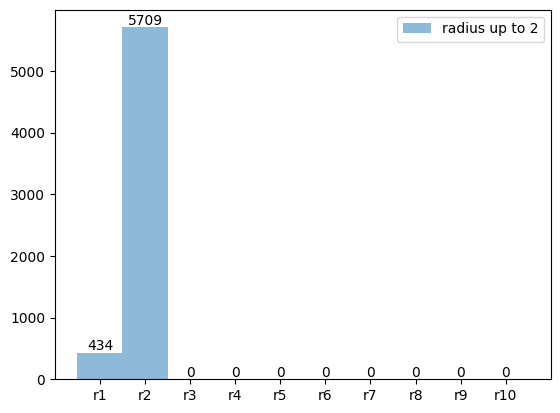

finish entropy list
DB_Specific_FP_loader is setup


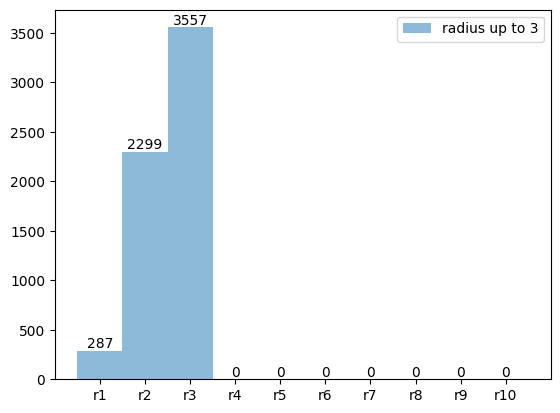

finish entropy list
DB_Specific_FP_loader is setup


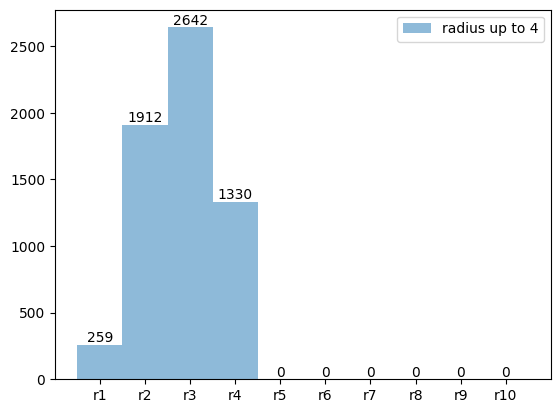

finish entropy list
DB_Specific_FP_loader is setup


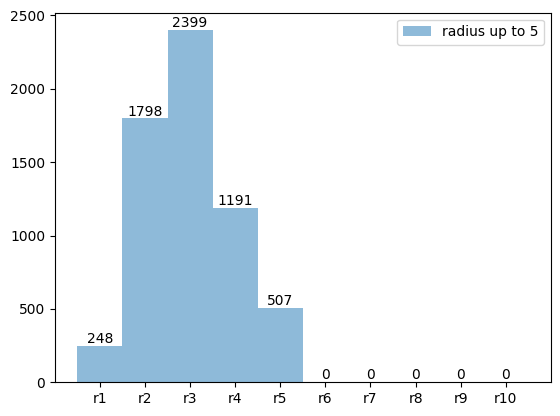

finish entropy list
DB_Specific_FP_loader is setup


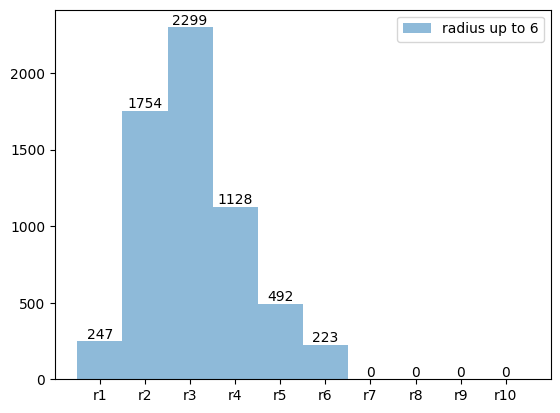

finish entropy list
DB_Specific_FP_loader is setup


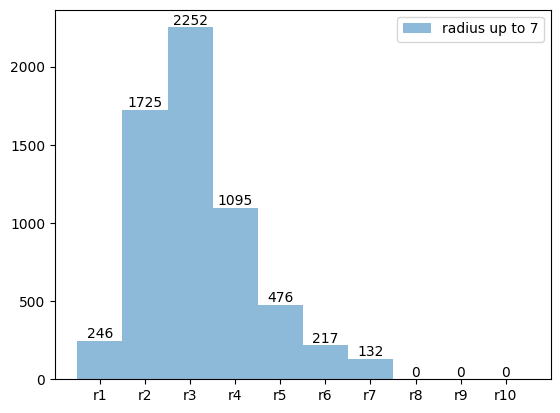

finish entropy list
DB_Specific_FP_loader is setup


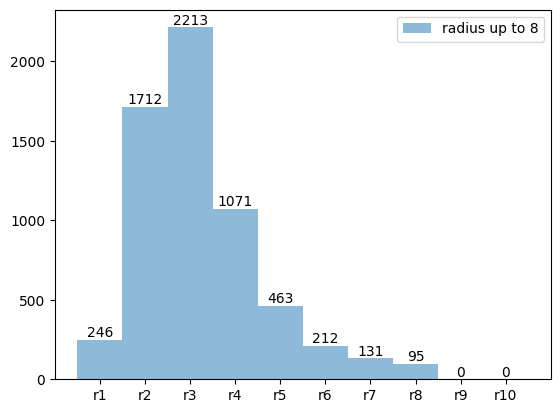

finish entropy list
DB_Specific_FP_loader is setup


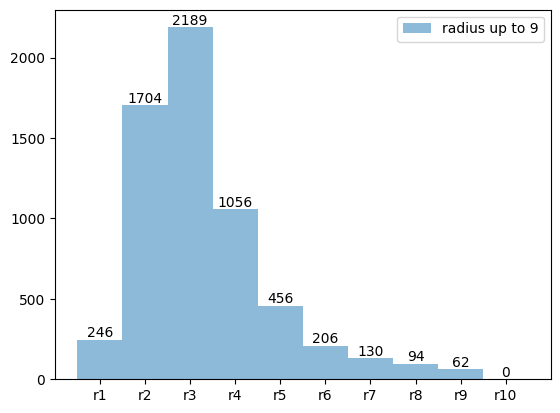

finish entropy list
DB_Specific_FP_loader is setup


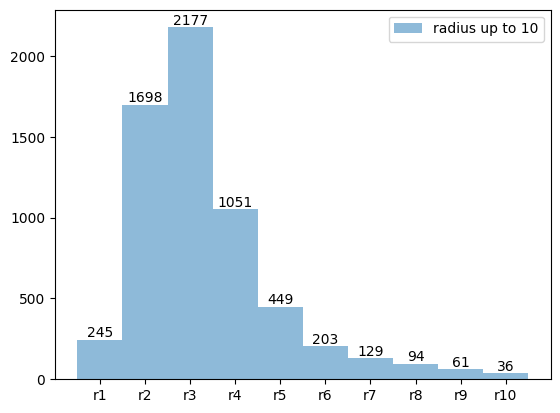

In [4]:

from matplotlib import pyplot as plt
for radius in range(2, 11):
    entropy_each_frag, counts, total_dataset_size = fp_loader.setup(out_dim=6144, max_radius=radius)
    frags_to_keep = fp_loader.frag_to_index_map.keys()
    radius_collection = [fp_loader.radius_mapping[frag] for frag in frags_to_keep]
    plt.figure()
    plt.xticks(range(1, 11), labels=[f"r{r}" for r in range(1,11)])
    plt.hist(radius_collection, bins=np.arange(1, 12) - 0.5, alpha=0.5, label='radius up to {}'.format(radius))
    
    # Add text to show the counts
    for i in range(1, 11):
        count = radius_collection.count(i)
        plt.text(i, count, str(count), ha='center', va='bottom')
    
    plt.legend()
    plt.show()

In [5]:
counts, total_dataset_size

(array([    16, 171474, 173422, ...,      1,      1,      1]), 3255374)

In [6]:
entropy_each_frag.max(), entropy_each_frag.min(), entropy_each_frag.mean(), entropy_each_frag.std()

(np.float64(-6.6457469615086816e-06),
 np.float64(-0.22536753342643284),
 np.float64(-0.00038613494063051364),
 np.float64(0.004246468676373369))

In [7]:
counts.max(), counts.min(), counts.mean(), counts.std()

(np.int64(173422),
 np.int64(1),
 np.float64(151.96961974212107),
 np.float64(2610.5664723945833))

In [12]:
prob = 173422/total_dataset_size
entropy = -prob * np.log2(prob)
entropy

np.float64(0.22536753342643284)

In [11]:
len(entropy_each_frag), len(counts), len(frags_to_keep)

(39631, 39631, 6144)

In [27]:
import torch

# Original tensor
x = torch.tensor([10, 20, 30, 40, 50])

# Indices to set to zero
zeros = torch.tensor([1, 3])  # Indices to be zeroed

# Set the elements at specified indices to zero
x[zeros] = 0

print(x)  # Output: tensor([10,  0, 30,  0, 50])


tensor([10,  0, 30,  0, 50])


In [29]:
zeros.dtype

torch.int64